In [1]:
library(ggplot2)
library(data.table)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### 1.Load virtual4C datasets

In [2]:
v4c <- fread("3.1-CaptureC/Pax3_virtual4c.tsv")

In [3]:
v4c$experiment %>% unique()

[1] "DelB"      "DelBs"     "F1F2"      "F1F2inv"   "R1F2"      "R1_4"     
[7] "ALL"       "FALL-R124"

In [4]:
v4c$experiment <- factor(v4c$experiment,levels = c("DelBs","R1F2","R1_4","F1F2","FALL-R124","F1F2inv","ALL","DelB"))

### 2. Global plots

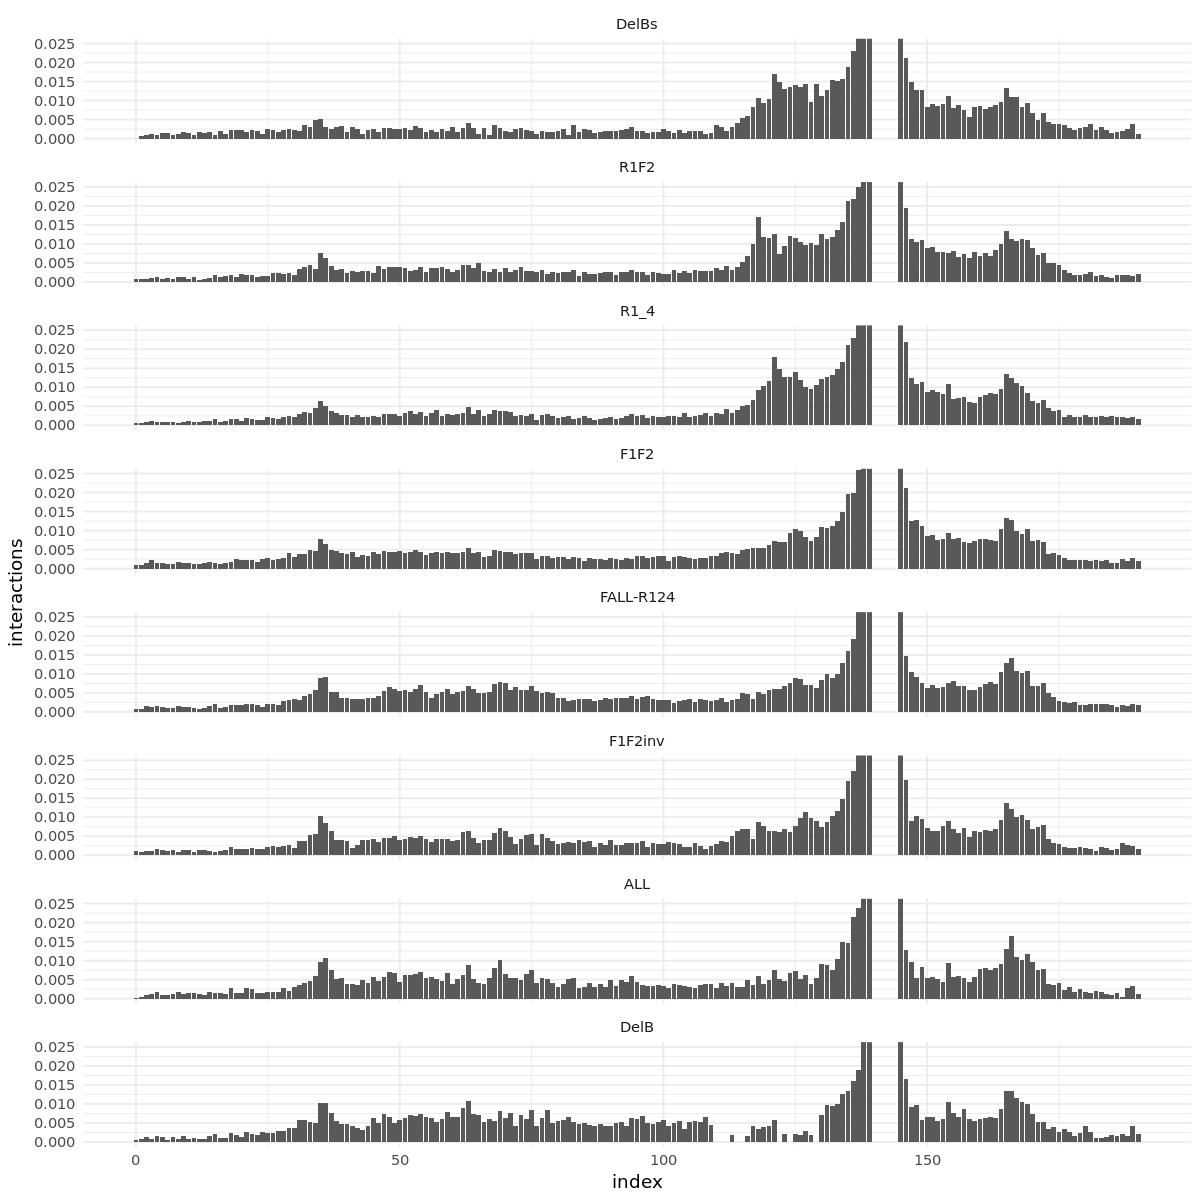

In [7]:
options(repr.plot.height=10,repr.plot.width=10)
ggplot(data=v4c,aes(x=index,y=interactions)) + 
    geom_bar(stat="identity") + 
    facet_wrap(~experiment,ncol=1) + 
    coord_cartesian(ylim = c(0,0.025)) + 
    theme_minimal()
ggsave("3.2-CaptureC_Pax3v4c/plots/Pax3_separate.pdf",width=10,height=24)

In [6]:
options(repr.plot.height=3,repr.plot.width=10)

experiments <- levels(v4c$experiment)

lapply(experiments[2:length(experiments)],function(x){
    ggplot(data=filter(v4c,experiment %in% c("DelBs",x)),aes(x=index,y=interactions,fill=experiment,color=experiment)) + 
    geom_area(stat="identity",alpha=0.3,position="dodge") + 
    coord_cartesian(ylim=c(0,0.025)) +
    scale_fill_manual(values=c("black","red")) + 
    scale_color_manual(values=c("black","red")) + 
    theme_minimal()
    ggsave(paste0("3.2-CaptureC_Pax3v4c/plots/Pax3_",x,"_vs_DelBs.pdf"),width = 10,height = 3)
    }) -> lplots

Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”
Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”
Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”
Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”
Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”
Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”
Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”


### 3. Comparison plots

+ ALL vs DelB

Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”
Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”


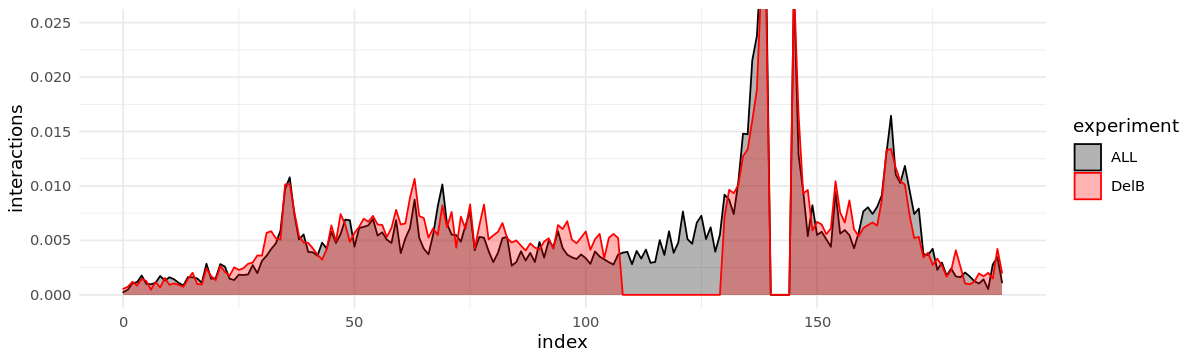

In [43]:
ggplot(data=filter(v4c,experiment %in% c("DelB","ALL")),aes(x=index,y=interactions,fill=experiment,color=experiment)) + 
    geom_area(stat="identity",alpha=0.3,position="dodge") + 
    coord_cartesian(ylim=c(0,0.025)) +
    scale_fill_manual(values=c("black","red")) + 
    scale_color_manual(values=c("black","red")) + 
    theme_minimal()

ggsave("3.2-CaptureC_Pax3v4c/plots/Pax3_DelB_vs_ALL.pdf",width=10,height=3)

+ Fall vs Fall-inv

Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”
Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”


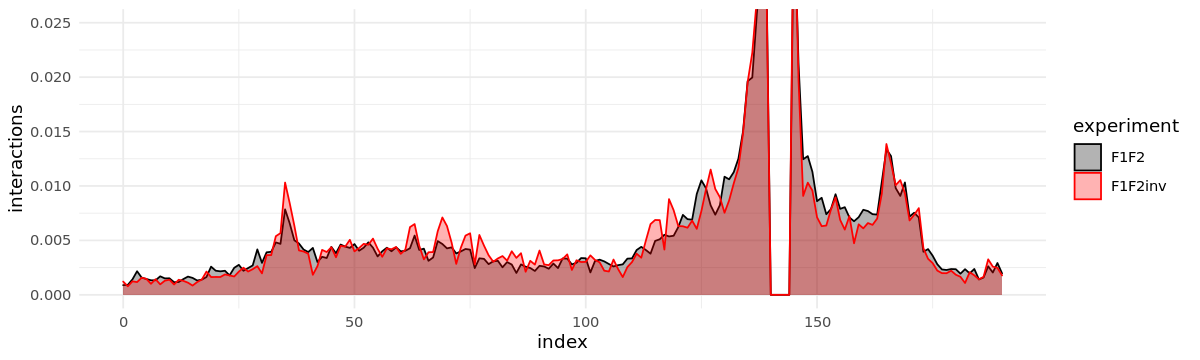

In [44]:
ggplot(data=filter(v4c,experiment %in% c("F1F2inv","F1F2")),aes(x=index,y=interactions,fill=experiment,color=experiment)) + 
    geom_area(stat="identity",alpha=0.3,position="dodge") + 
    coord_cartesian(ylim=c(0,0.025)) +
    scale_fill_manual(values=c("black","red")) + 
    scale_color_manual(values=c("black","red")) + 
    theme_minimal()

ggsave("figurePlots/Pax3_F1F2inv_vs_F1F2.pdf",width=10,height=3)

+ R3-only vs ALL

Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”
Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”


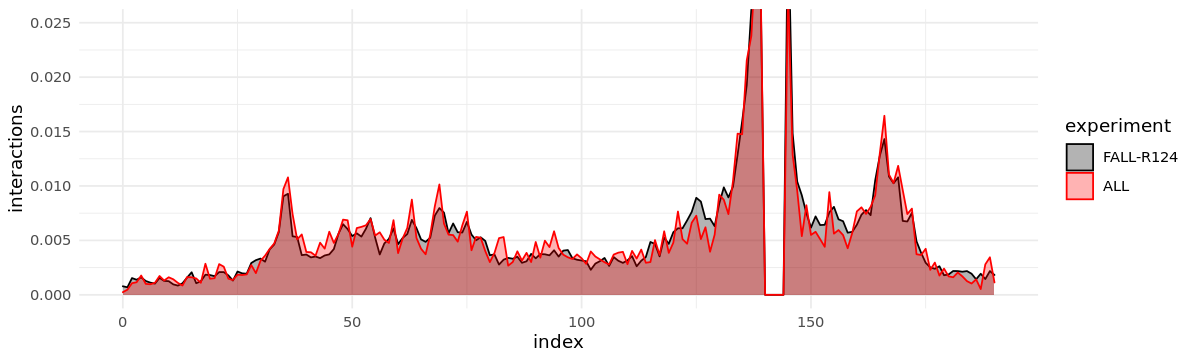

In [10]:
options(repr.plot.height=3,repr.plot.width=10)
ggplot(data=filter(v4c,experiment %in% c("FALL-R124","ALL")),aes(x=index,y=interactions,fill=experiment,color=experiment)) + 
    geom_area(stat="identity",alpha=0.3,position="dodge") + 
    coord_cartesian(ylim=c(0,0.025)) +
    scale_fill_manual(values=c("black","red")) + 
    scale_color_manual(values=c("black","red")) + 
    theme_minimal()

ggsave("figurePlots/Pax3_R3only_vs_ALL.pdf",width=10,height=3)

+ R3-only vs Fall

Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”
Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”


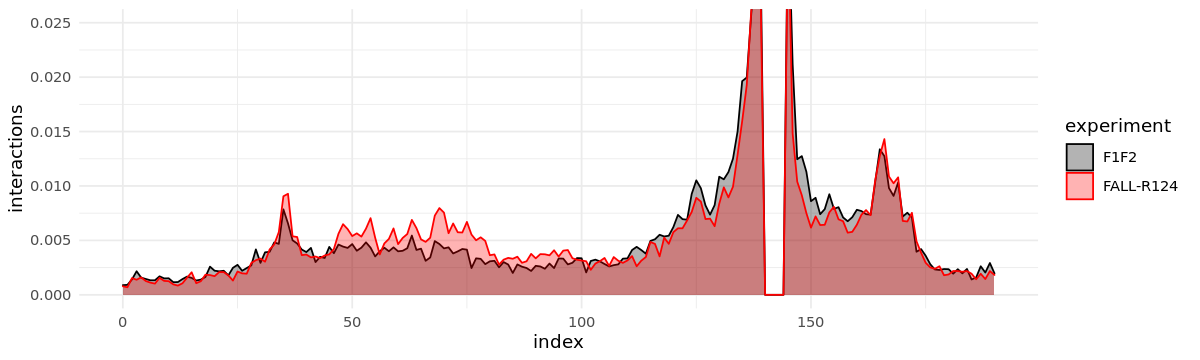

In [11]:
options(repr.plot.height=3,repr.plot.width=10)
ggplot(data=filter(v4c,experiment %in% c("FALL-R124","F1F2")),aes(x=index,y=interactions,fill=experiment,color=experiment)) + 
    geom_area(stat="identity",alpha=0.3,position="dodge") + 
    coord_cartesian(ylim=c(0,0.025)) +
    scale_fill_manual(values=c("black","red")) + 
    scale_color_manual(values=c("black","red")) + 
    theme_minimal()

ggsave("figurePlots/Pax3_R3only_vs_FALL.pdf",width=10,height=3)